In [1]:
#Perform clustering (hierarchical, K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.

In [2]:
import pandas as pd
import numpy as np

import seaborn as snb
import matplotlib.pyplot as plt

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

In [10]:
Airlines = pd.read_excel('C:\\Users\\deepa\\Downloads\\EastWestAirlines.xlsx',sheet_name='data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
Airlines1= Airlines.drop('ID#', axis=1)

In [12]:
Airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
Airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [14]:
Airlines1[Airlines.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


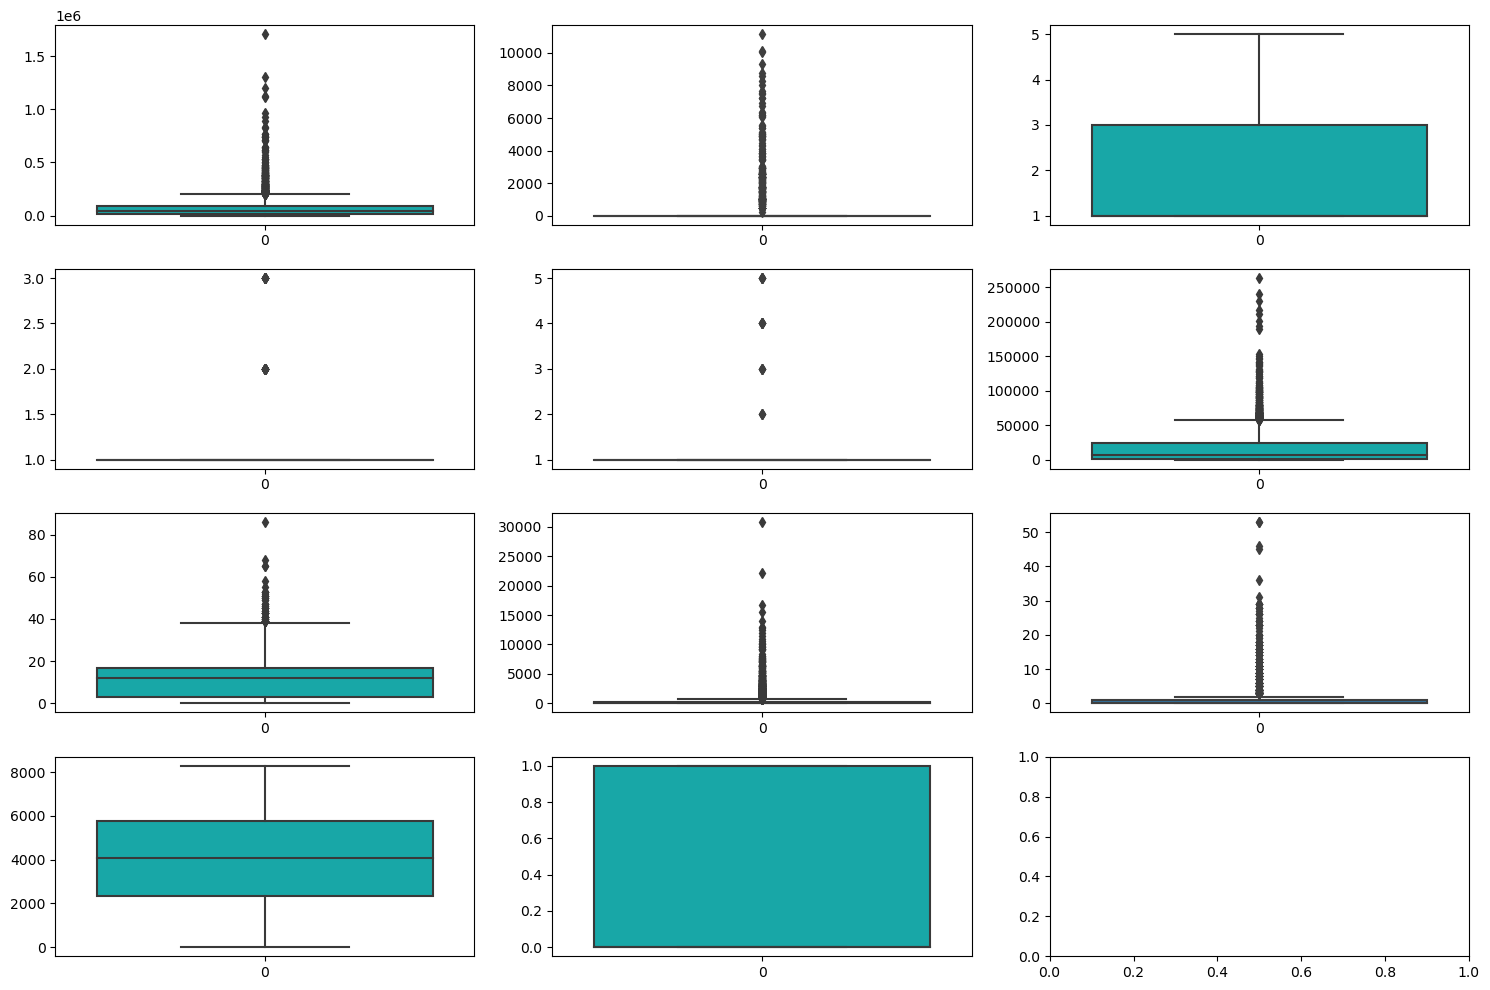

In [19]:
#Checking for outliers with boxplot
fig, ax = plt.subplots(4, 3, figsize=(15,10))
snb.boxplot(Airlines1.Balance, ax=ax[0,0],color='c')
snb.boxplot(Airlines1.Qual_miles, ax=ax[0,1])
snb.boxplot(Airlines1.cc1_miles, ax=ax[0,2],color='c')
snb.boxplot(Airlines1.cc2_miles, ax=ax[1,0])
snb.boxplot(Airlines1.cc3_miles, ax=ax[1,1])
snb.boxplot(Airlines1.Bonus_miles, ax=ax[1,2],color='c')
snb.boxplot(Airlines1.Bonus_trans, ax=ax[2,0],color='c')
snb.boxplot(Airlines1.Flight_miles_12mo, ax=ax[2,1],color='c')
snb.boxplot(Airlines1. Flight_trans_12, ax=ax[2,2])
snb.boxplot(Airlines1.Days_since_enroll, ax=ax[3,0],color='c')
snb.boxplot(Airlines1["Award?"], ax=ax[3,1],color='c')
plt.tight_layout()
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_16856\1471280605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snb.distplot(Airlines1.Balance, ax=ax[0,0])
C:\Users\deepa\AppData\Local\Temp\ipykernel_16856\1471280605.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snb.distplot(Airlines1.Qual_miles, ax=ax[0,1])
C:\Us

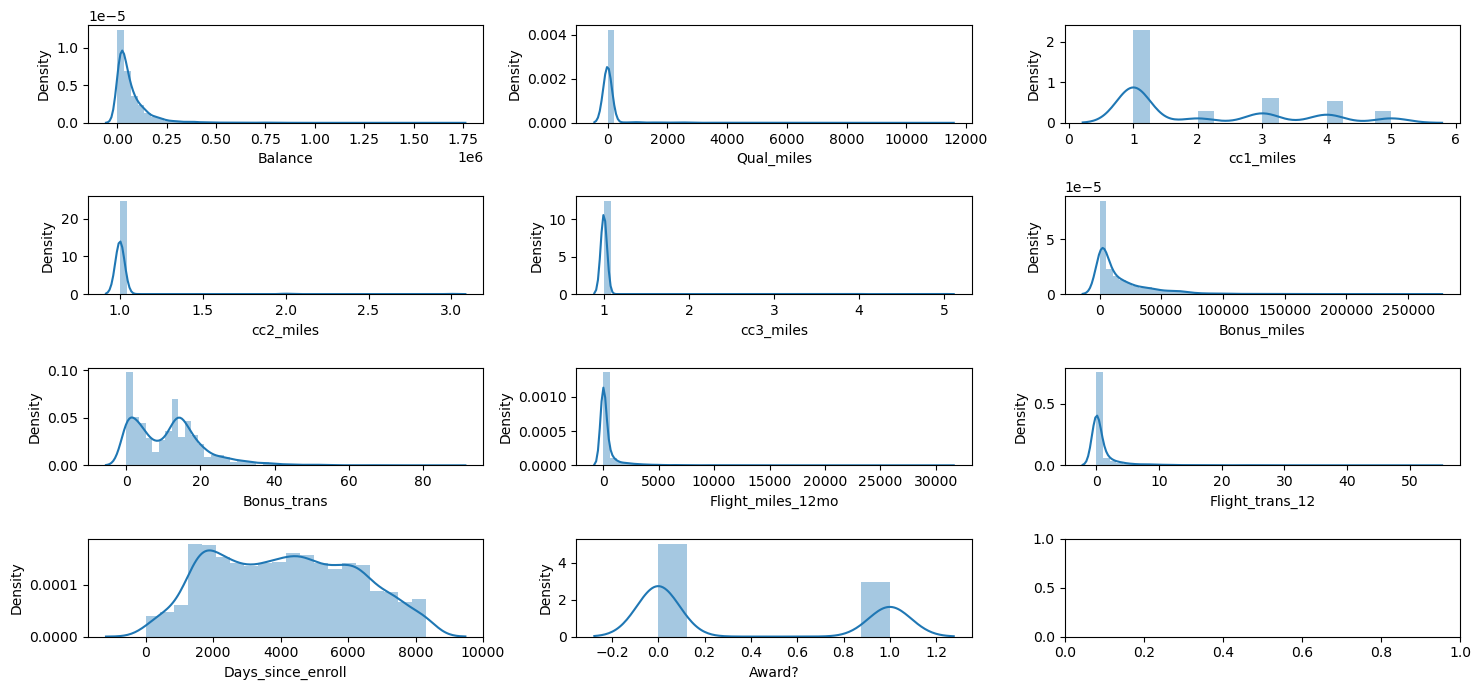

In [21]:
#Cheking if the data is normally distributed using distplot
fig, ax = plt.subplots(4, 3, figsize=(15,7))
snb.distplot(Airlines1.Balance, ax=ax[0,0])
snb.distplot(Airlines1.Qual_miles, ax=ax[0,1])
snb.distplot(Airlines1.cc1_miles, ax=ax[0,2])
snb.distplot(Airlines1.cc2_miles, ax=ax[1,0])
snb.distplot(Airlines1.cc3_miles, ax=ax[1,1])
snb.distplot(Airlines1.Bonus_miles, ax=ax[1,2])
snb.distplot(Airlines1.Bonus_trans, ax=ax[2,0])
snb.distplot(Airlines1.Flight_miles_12mo, ax=ax[2,1])
snb.distplot(Airlines1. Flight_trans_12, ax=ax[2,2])
snb.distplot(Airlines1.Days_since_enroll, ax=ax[3,0])
snb.distplot(Airlines1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [22]:
Airlines2 = Airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]]
Airlines2_transformed = power_transform(Airlines2, method='yeo-johnson')

In [23]:
Airlines2 =pd.DataFrame (Airlines2_transformed,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"])
Airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


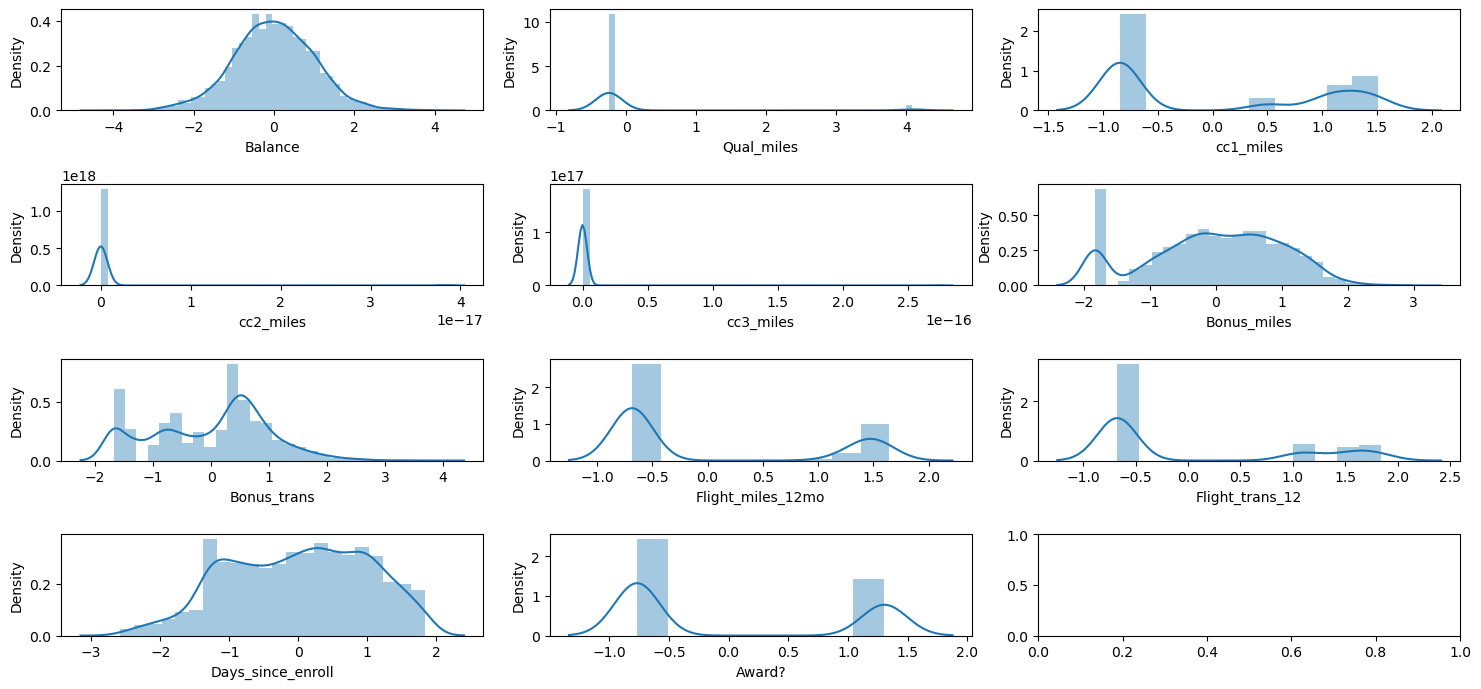

In [24]:
#Checking the normal distribution of the data, after Power transformation
fig, ax = plt.subplots(4, 3, figsize=(15,7))
snb.distplot(Airlines2.Balance, ax=ax[0,0])
snb.distplot(Airlines2.Qual_miles, ax=ax[0,1])
snb.distplot(Airlines2.cc1_miles, ax=ax[0,2])
snb.distplot(Airlines2.cc2_miles, ax=ax[1,0])
snb.distplot(Airlines2.cc3_miles, ax=ax[1,1])
snb.distplot(Airlines2.Bonus_miles, ax=ax[1,2])
snb.distplot(Airlines2.Bonus_trans, ax=ax[2,0])
snb.distplot(Airlines2.Flight_miles_12mo, ax=ax[2,1])
snb.distplot(Airlines2.Flight_trans_12, ax=ax[2,2])
snb.distplot(Airlines2.Days_since_enroll, ax=ax[3,0])
snb.distplot(Airlines2["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Dendogram')

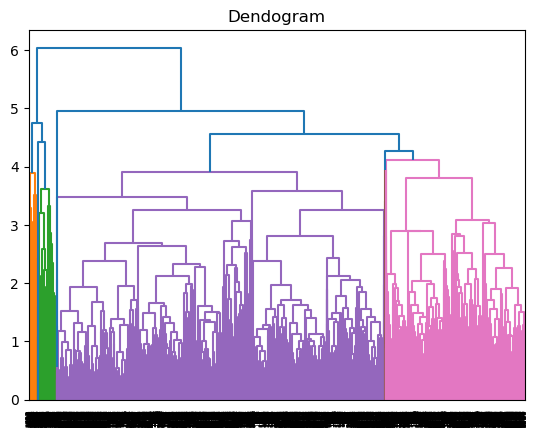

In [26]:
#Creating cluster using hierarchical clustering
#Applying average linkage method

dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='average'))
plt.title("Dendogram")

In [27]:
#Creating Agglomerative Clustering
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [28]:
#Fitting the data on the model
y_hc1 = hc1.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [29]:
#Creating a new column cluster of the hierrachial cluster labels
Airlines['cluster'] = y_hc1
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


In [30]:
#Viewing how many categories are included in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



Text(0.5, 1.0, 'Dendogram')

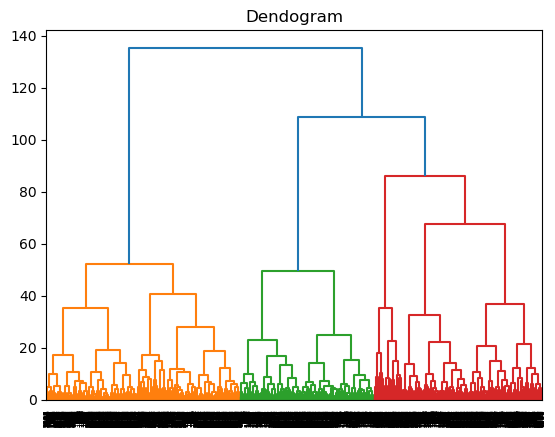

In [31]:
#Applying centroid(ward) linkage method
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='ward'))
plt.title("Dendogram")

In [32]:
#Creating Cluster using centroid linkage method
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [33]:
#Fitting the data on the hierarchial model that is created
y_hc2 = hc2.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])
Airlines['cluster'] = y_hc2
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [34]:
#Viewing how many categories are included in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()


cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



Text(0.5, 1.0, 'Dendogram')

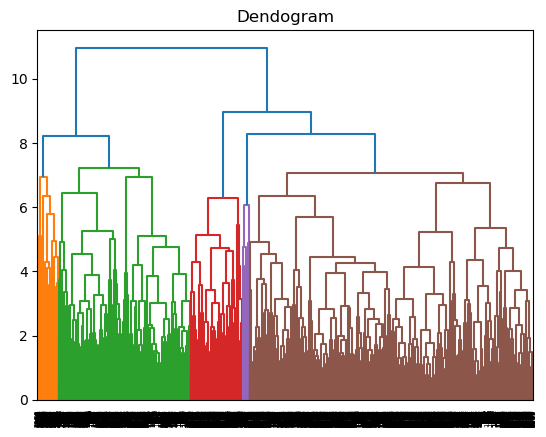

In [35]:
#Applying complete linkage method
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='complete'))
plt.title("Dendogram")

In [36]:
#Creatig Cluster using complete linkage method
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc3 = hc3.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [37]:
#Creating a cluster column in the dataset, that has categorised the data using hierrachial clustering
Airlines['cluster'] = y_hc3
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [38]:
#Viewing how many categories are included in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



Text(0.5, 1.0, 'Dendogram')

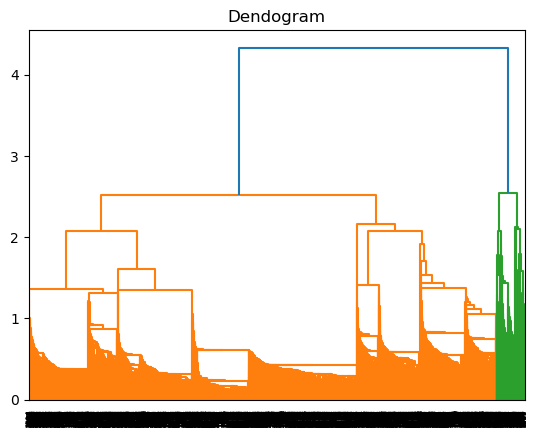

In [39]:
#Applying single linkage method
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='single'))
plt.title("Dendogram")

In [40]:
#Creating a Cluster using single linkage method, fitting the data on the model and creating a new cluster column with cluster labels
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
Airlines['cluster'] = y_hc4
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [41]:
#Viewing how many categories are included in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



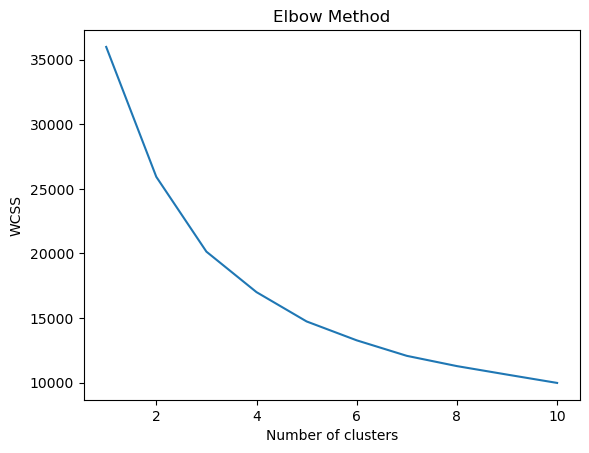

In [42]:
#Applying K-means clustering
#Plotting elbow curve
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Airlines2_transformed)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
#Creating a 5 group cluster, with Kmeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(Airlines2_transformed)

KMeans(n_clusters=5, random_state=42)

In [44]:
KM_label=clusters_new.labels_
Airlines['cluster'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-6.75212840e-01, -2.32991180e-01, -8.35590446e-01,
         4.66045113e-19, -2.69630192e-33, -9.09080934e-01,
        -8.19433548e-01, -6.82084186e-01, -6.73778986e-01,
        -3.10971055e-01, -5.14035484e-01],
       [ 3.71613101e-01, -2.44743303e-01,  9.10506666e-01,
         2.91327607e-19,  2.55720899e-18,  7.17781846e-01,
         5.92471428e-01, -6.83308041e-01, -6.74970335e-01,
         2.39016631e-01,  1.81555873e-01],
       [ 1.60074522e-02, -2.44743303e-01, -8.19239258e-01,
         7.32640630e-19,  1.54074396e-33, -2.79105284e-01,
        -2.72262658e-01,  1.45172819e+00,  1.43587521e+00,
        -9.52588092e-02,  7.15349601e-02],
       [ 7.54505594e-01, -2.44743303e-01,  1.11374957e+00,
         2.77052025e-19,  2.98460591e-18,  1.03665259e+00,
         1.04603128e+00,  1.45646102e+00,  1.41053352e+00,
         3.58290326e-01,  6.72519442e-01],
       [ 5.95617244e-01,  4.08591363e+00,  6.27073775e-02,
         1.71909534e-19,  1.23462301e-18,  3.71406537e-01,
  

In [45]:
#Viewing the number of categories in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1474

cluster 1
Total Members: 1179

cluster 2
Total Members: 573

cluster 3
Total Members: 551

cluster 4
Total Members: 222



In [46]:
#Applying DBSCAN clustering technique
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Airlines2)

DBSCAN(eps=0.8, min_samples=6)

In [47]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0], dtype=int64)

In [48]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl

,cluster_db
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,5
3996,4
3997,6


In [49]:
Airlines3 = pd.concat([Airlines,cl],axis=1)
Airlines3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,6


In [51]:
s1=(metrics.silhouette_score(Airlines2_transformed,y_hc1))
s1

0.24511194875209383

In [52]:
s2=(metrics.silhouette_score(Airlines2_transformed,y_hc2))
s2

0.3240550069814065

In [53]:
s3=(metrics.silhouette_score(Airlines2_transformed,y_hc3))
s3

0.19985213995606269

In [54]:
s4=(metrics.silhouette_score(Airlines2_transformed,y_hc4))
s4

0.2971406781364072

In [55]:
s5=(metrics.silhouette_score(Airlines2_transformed,clusters_new.labels_))
s5

0.32518610185189556

In [56]:
s6=(metrics.silhouette_score(Airlines2_transformed,Airlines3.cluster_db))
s6

0.2340657983934542

In [57]:
#Consolidating:
t={'Model':['Average','Centrod','Complete','Single','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Average,0.245112
1,Centrod,0.324055
2,Complete,0.199852
3,Single,0.297141
4,Kmeans,0.325186
5,DBScan,0.234066


In [ ]:
#Conclusion:
#After applying of different types of hierarchical clustering, Kmeans and DB Scan clustering techniques, we found that kmeans clustering is sensitive for outlier, but gives a high silhouette score
#Hierarchical cluster is way more complex to understand, in which centroid linkage gives a better result its silhouette score is similar to kmeans clustering.
#In heirarchical clustering, the other linkage methods have a biased clustering, showing that 70% data is belongs to only one cluster. So we predict the result only with kmeans clustering
#Moreover 5 clusters are the perfect number of clusters for making infrences on this dataset